

# Project: Investigate a No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


 A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
 <br />This dataset collects information from 100k medical appointments in Brazil and is focused on the question **"is it possible to predict someone to no-show an appointment?"**
<br /> The data contain 14 associated variables (characteristics). The most important ones if the patient show-up or no-show to the appointment.




In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 



### General overview
in the cell below, we'll load our data then we'll get the size of our dataset (no. of columns and rows) using `shape` function. After that we'll have a quick overview on the first few rows in the dataset using `head` function.


In [92]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

In [93]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Check for null values
First of all, we need to check if there are any null values in our dataset, in order to do that we use `info` function to check that the no. of enteries in each road are the same as the total no. of rows.<br />Also, the `info` function will provide us with the type of the data stored in each column.


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>It seems like there's **no missing values**, since all columns have 110,527 value which is the same no. of total entries.


### Check for duplicates rows
Now is the time for checking for duplicates rows, we can do that using `duplicated` function which inform us if each row is duplicated or not.
Since we are more intreasted in the total no. of duplicated rows, we use `sum` function to get us the overall no. of the repeaated rows.


In [95]:
df.duplicated().sum()

0

>Also, **thers's no duplicated rows!** it seems like this data is very clean!

### Data Cleaning 
After previous checks, time to work!
It looks like our data needs three cleaning processes:
<br />**1-** Droppoing unwanted rows: using `drop` function, we will drop **PatientId, AppointmentID, ScheduledDay, Scholarship, Hipertension, Diabetes, Alcoholism** and **Handcap** columns from our dataset because these columns has nothing to do with our questions.
<br />**2-** Converting the data type for AppointmentDay from object to date time: we will use `to_datetime` command in this conversion.
<br />**3-** Renaming both the columns and the values for No-show columnt to help us in farther analysis.

In [96]:
# Droppoing unwanted rows
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis=1, inplace=True)

In [97]:
# Converting the data type for AppointmentDay from object to date time
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [98]:
# Renaming the columns 
new_labels = list(df.columns)
new_labels[5] = 'Show_or_Not'
df.columns = new_labels

In [99]:
#
df = df.replace({'Show_or_Not': {'Yes': 'No_Show','No': 'Show_Up'}}) 


In [100]:
# Check!
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
SMS_received      110527 non-null int64
Show_or_Not       110527 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### How does the age  of the patient affect the probability of missing the appointment ?

In [101]:
df.describe()

,Age,SMS_received
count,110527.000000,110527.000000
mean,37.088874,0.321026
std,23.110205,0.466873
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


In [111]:
bin_edges = [-1 ,20 ,40 ,115]
bin_names = [ 'under_20', 'between_20_and_40','Above_40']
df['Age_Category'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [112]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,SMS_received,Show_or_Not,Age_Category
0,F,2016-04-29,62,JARDIM DA PENHA,0,Show_Up,Above_40
1,M,2016-04-29,56,JARDIM DA PENHA,0,Show_Up,Above_40
2,F,2016-04-29,62,MATA DA PRAIA,0,Show_Up,Above_40
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,Show_Up,under_20
4,F,2016-04-29,56,JARDIM DA PENHA,0,Show_Up,Above_40


In [120]:
# get counts for each age and showing case
showing_case_counts = df.groupby(['Show_or_Not', 'Age_Category']).count()['Age']
showing_case_counts

Show_or_Not  Age_Category     
No_Show      under_20              7096
             between_20_and_40     6626
             Above_40              8597
Show_Up      under_20             24752
             between_20_and_40    22209
             Above_40             41246
Name: Age, dtype: int64

In [121]:
# get total counts for each showing case
showing_case_total = df.groupby('Show_or_Not').count()['Age']
showing_case_total

Show_or_Not
No_Show    22319
Show_Up    88208
Name: Age, dtype: int64

In [122]:
# get proportions by dividing Show_Up ages counts by total # of Show_up samples
show_up_proportions = showing_case_counts['Show_Up'] / showing_case_total['Show_Up']
show_up_proportions

Age_Category
under_20             0.280609
between_20_and_40    0.251780
Above_40             0.467599
Name: Age, dtype: float64

In [123]:
# get proportions by dividing No_Show ages counts by total # of Show_up samples
No_Show_proportions = showing_case_counts['No_Show'] / showing_case_total['No_Show']
No_Show_proportions

Age_Category
under_20             0.317935
between_20_and_40    0.296877
Above_40             0.385188
Name: Age, dtype: float64

In [125]:
ind = np.arange(len(show_up_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

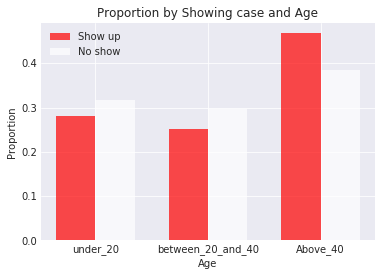

In [127]:
# plot bars
show_up_bars = plt.bar(ind, show_up_proportions, width, color='r', alpha=.7, label='Show up')
white_bars = plt.bar(ind + width, No_Show_proportions, width, color='w', alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.title('Proportion by Showing case and Age')
locations = ind + width / 2  # xtick locations
labels = ['under_20', 'between_20_and_40','Above_40']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### Does sending SMS messages help decreasing the no. of no-show appointments ?

In [108]:
Show = df.query('Show_or_Not == "Show_Up"')
No_Show = df.query('Show_or_Not == "No_Show"')

In [109]:
mean_sms_show = Show['SMS_received'].mean()
mean_sms_no_show = No_Show['SMS_received'].mean()

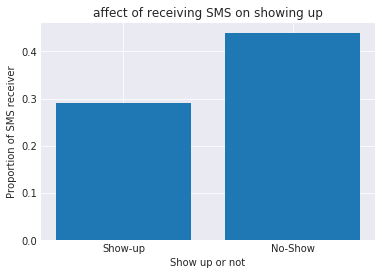

In [110]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_sms_show, mean_sms_no_show]
labels = ['Show-up', 'No-Show']
plt.bar(locations, heights, tick_label=labels)
plt.title('affect of receiving SMS on showing up')
plt.xlabel('Show up or not')
plt.ylabel('Proportion of SMS receiver');

### Who is more likely to miss the appointment, men or women?

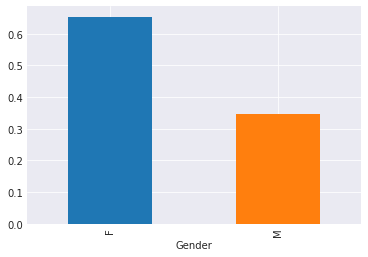

In [169]:
gender_count = No_Show.groupby('Gender').count()['Age']
total_count = No_Show.count()['Age']
proportions = gender_count/total_count
proportions.plot.bar()

<a id='conclusions'></a>
## Conclusions
<br />1- Women are more likely to not show up for the appointment than men.
<br />2- SMS messages doesn't help in decreasing the precenage of no-show appointments.
<br />3- Patient in middle age (between 20 and 40) are the least category to not show-up.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])